<a href="https://colab.research.google.com/github/jpsiegel/Projects/blob/master/AnalisisSatelitalFloraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Floraciones Algales utilizando Imágenes satelitales
Tarea entrevista WaterMind

Entrega por Jan Siegel

## Introducción

**fluorescence**
noun
/flʊəˈrɛsns/: the property of absorbing radiation of short wavelength and emitting radiation of longer wavelength.


One of the fates of a photon striking a chlorophyll molecule is fluorescence (the other two are absorption to create chemical energy, and dissipation as heat). Thus, illuminated plants are constantly fluorescing, but in a frequency we cannot see. It turns out that measurement of this fluorescence can be used to infer a lot of useful things...





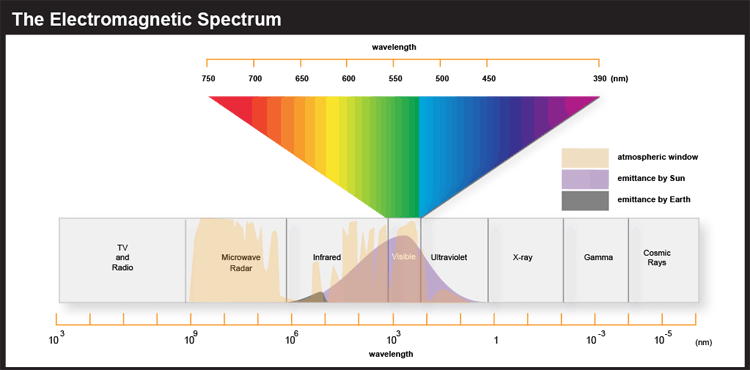

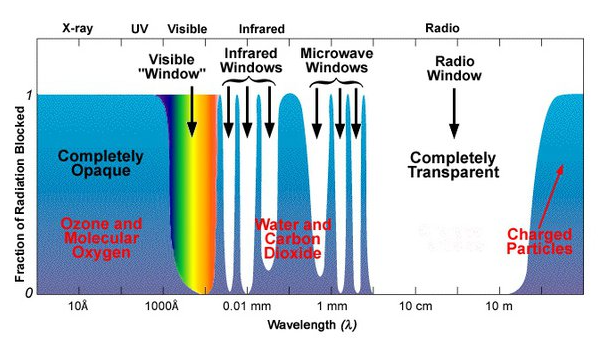

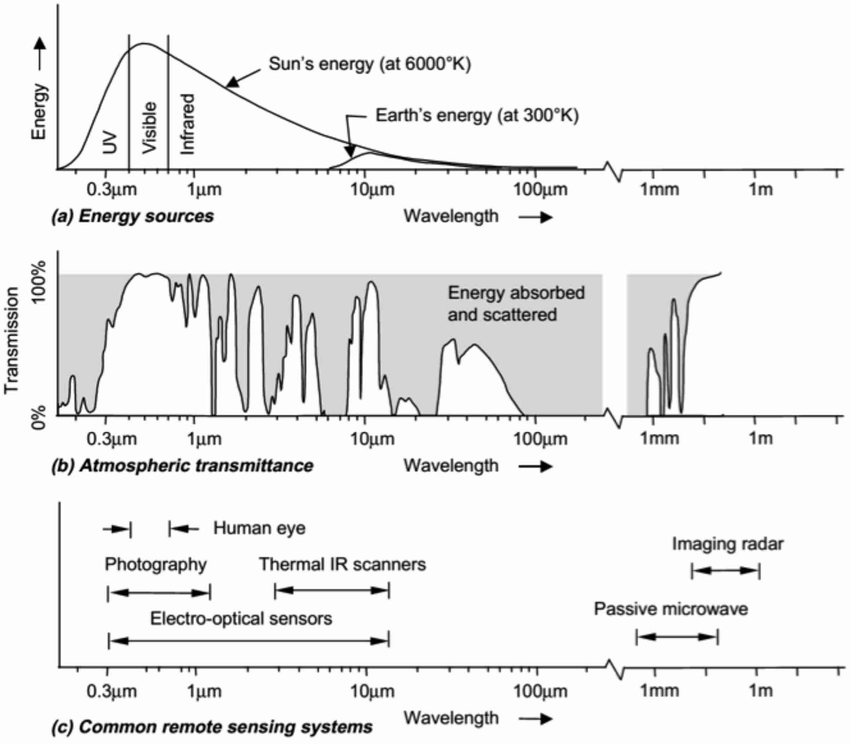



#1. Carga y visualización de imágenes

In [1]:
!pip install rioxarray --quiet
import requests
import io
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
my_dir = "/content/drive/MyDrive/WaterMind/SatData/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class Image():

  id = 1

  def __init__(self, date, name, source, file=None, data=None):
    self.id = Image.id
    self.date = date
    self.name = name
    self.source = source
    self.file = file
    self.data = None
    Image.id += 1

  def load_file(self, mode="disk"):
    """
    Parse bytes from .nc file into Xarray Dataset data structure
    Use mode memory if file is not stored locally
    """

    if mode == "disk":
      with xr.open_dataset(my_dir + self.name) as ds:
        print(ds.keys())
        self.data = ds

    elif mode == "memory":
      bytes_ = self.file
      self.data = xr.load_dataset(io.BytesIO(bytes_)).load() # use open_dataset if file cannot fit in memory
      self.file = None # free up memory

    print("Loaded", self.name)
    return self.data

  def get_file_from_source(self):

    """
    Deprecated in favor of local storage.
    Calls URL associated to image and downloads content to memory.
    """
    response = requests.get(self.source, allow_redirects=True)
    print("Response received: ", response)
    self.file = response.content

    return self.file






In [4]:
image1 = Image("21/01/2023",
               "villarrica_2021_01_21_14_03_15.nc",
               "https://storage.googleapis.com/interviews-watermind/villarrica/villarrica_2021_01_21_14_03_15.nc"
               )

image2 = Image("03/05/2023",
               "villarrica_2023_05_03_13_36_46.nc",
               "https://storage.cloud.google.com/interviews-watermind/villarrica/villarrica_2023_05_03_13_36_46.nc"
               )

images = [image1, image2]

for img in images:
  #img.get_file_from_source()
  img.load_file()

print("Satelite Image dataset")
print(image1.data.data_vars)
print(image1.data)


KeysView(<xarray.Dataset>
Dimensions:              (x: 8245, y: 4455)
Coordinates:
  * x                    (x) float64 7.376e+05 7.376e+05 ... 7.623e+05 7.623e+05
  * y                    (y) float64 5.658e+06 5.658e+06 ... 5.644e+06 5.644e+06
Data variables: (12/19)
    transverse_mercator  float64 ...
    lon                  (y, x) float32 ...
    lat                  (y, x) float32 ...
    rhot_444             (y, x) float32 ...
    rhos_444             (y, x) float32 ...
    rhot_492             (y, x) float32 ...
    ...                   ...
    rhot_666             (y, x) float32 ...
    rhos_666             (y, x) float32 ...
    rhot_707             (y, x) float32 ...
    rhos_707             (y, x) float32 ...
    rhot_866             (y, x) float32 ...
    rhos_866             (y, x) float32 ...
Attributes: (12/346)
    generated_by:                              ACOLITE
    generated_on:                              2023-09-15 19:33:16 -03
    contact:                     

In [5]:
band_names = list(image1.data.data_vars.keys())
band_wave_lengths = []

for name in band_names:
  if name[-1].isdigit():
    band_wave_lengths.append(int(name[-3:]))

print("Band Wavelengths available:", band_wave_lengths)

class ImageEditor: # maneja las capturas satelitales y display en plots
  def __init__(self, images, sizes):
    self.images = images
    self.sizes = sizes

  def get_images():
    """aca instanciamo las imgs"""
    pass

  def plotter(rasters, grid=(2,2), size=(80,80)): # los rasters son las matrices rgb basicamente
    """"aca armamos el fig con subplots"""
    pass

  def spectrum_palette():
    """aca seleccionamos y mezclamos canales"""
    pass

  def generate_plot(self, images, dict_image_bands):
    """dict_image_bands = [(image, bands_selected)] basicamente pa iterar por las cosas q qeremos plottear, que imagen y con que bandas? podria contener params como alpha tb"""

    rasters = []
    dim = len(images)
    for img, bands in images: #dict_image_bands.keys()
      raster = self.spectrum_handler(img, bands)
      rasters.append(raster)

    grid_size = (dim, dim)
    pixel_size = (80, 80)
    self.plotter(rasters, grid_size, pixel_size)

  def spectrum_palette(dataset, band_ids, selected_bands):
    """aca seleccionamos y mezclamos canales"""

    for band_id in set(selected_bands):
      if band_id not in band_ids:
        raise ValueError(f"Please select valid band name from: {band_ids}")

    alpha = 5
    rgb1 = np.stack([image1.data['rhot_666'].to_numpy(), image1.data['rhot_566'].to_numpy(), image1.data['rhot_492'].to_numpy()], axis=-1)
    raster = rgb1 * alpha


    return raster


Band Wavelengths available: [444, 444, 492, 492, 533, 533, 566, 566, 612, 612, 666, 666, 707, 707, 866, 866]


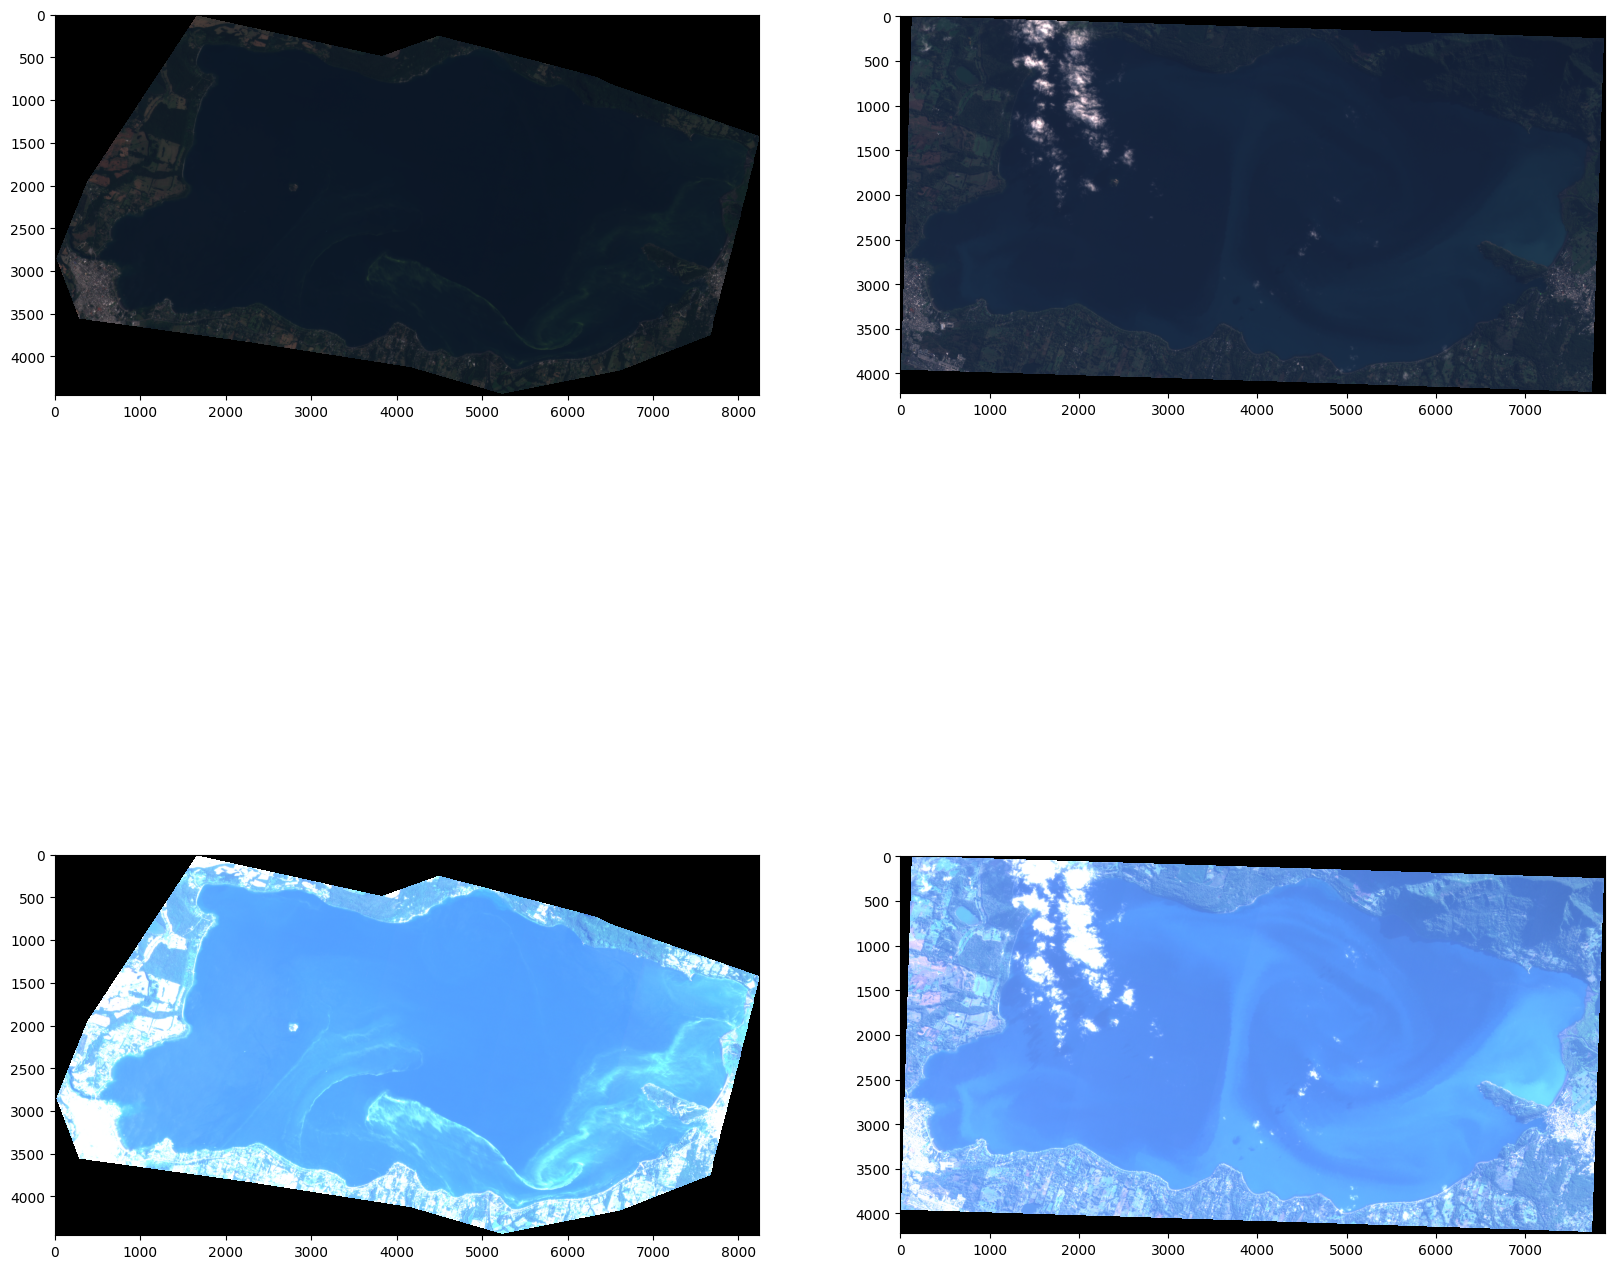

In [6]:
#print(image1.data.data_vars)
#image1.data['rhot_707'].plot()
#image2.data['rhot_707'].plot()
# si una matriz rgb tiene dim 1 (solo 1 canal), imshow te lo plotea de acuerdo a un colormap editable


# Este script tiene que usar las funciones de arriba
# Original code

alpha = 2
rgb1 = np.stack([image1.data['rhot_666'].to_numpy(), image1.data['rhot_566'].to_numpy(), image1.data['rhot_492'].to_numpy()], axis=-1)
rgb1 = rgb1 * alpha

rgb2 = np.stack([image2.data['rhot_666'].to_numpy(), image2.data['rhot_566'].to_numpy(), image2.data['rhot_492'].to_numpy()], axis=-1)
rgb2 = rgb2 * alpha

#when adjusting alpha
rgb3 = np.stack([image1.data['rhot_666'].to_numpy(), image1.data['rhot_566'].to_numpy(), image1.data['rhot_492'].to_numpy() * 0], axis=-1) # y si le sacamos el blue?
rgb3 = rgb1 * 7

rgb4 = np.stack([image2.data['rhot_666'].to_numpy(), image2.data['rhot_566'].to_numpy(), image2.data['rhot_492'].to_numpy()], axis=-1)
rgb4 = rgb2 * 4

f = plt.figure(figsize=(20,20))
f.add_subplot(2, 2, 1)
plt.imshow(rgb1)
f.add_subplot(2, 2, 2)
plt.imshow(rgb2)
f.add_subplot(2, 2, 3)
plt.imshow(rgb3)
f.add_subplot(2, 2, 4)
plt.imshow(rgb4)
plt.show(block=True)





#image2.data['rhot_866'].plot()
#xr.plot.imshow(image1.data['rhot_707'] / 2)
#image1.data["rhot_492"].plot()

#print(image1.data.indexes)
#image1.data['rhot_866'].plot()

#rgb = (image1.data['rhot_666'] + image1.data['rhot_566'] + image1.data['rhot_492']) / 3
#rgb.plot()
#import matplotlib.pyplot as plt
#plt.imshow(image1.data.read(1))
#image1.data.read()

(4455, 8245, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


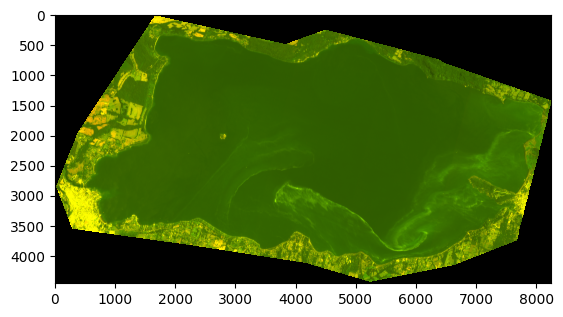

In [7]:
# replace blue with zeroes of same shape and vouala
stackk = np.stack([image1.data['rhot_666'].to_numpy(), image1.data['rhot_566'].to_numpy(), image1.data['rhot_492'].to_numpy()], axis=-1)
print(stackk.shape)
to_zero = image1.data['rhot_492'].to_numpy()
to_zero.fill(0)
print(to_zero)
alpha = 8
stackk_rdy1 = np.stack([image1.data['rhot_666'].to_numpy(), image1.data['rhot_566'].to_numpy(), to_zero], axis=-1) * alpha
plt.imshow(stackk_rdy1)


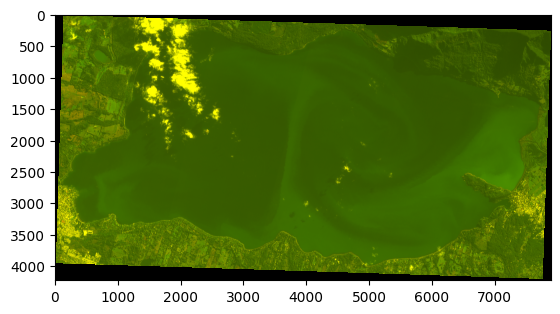

In [8]:
alpha = 5
to_zero2 = image2.data['rhot_492'].to_numpy()
to_zero2.fill(0)
stackk_rdy2 = np.stack([image2.data['rhot_666'].to_numpy(), image2.data['rhot_566'].to_numpy(), to_zero2], axis=-1) * alpha
plt.imshow(stackk_rdy2)

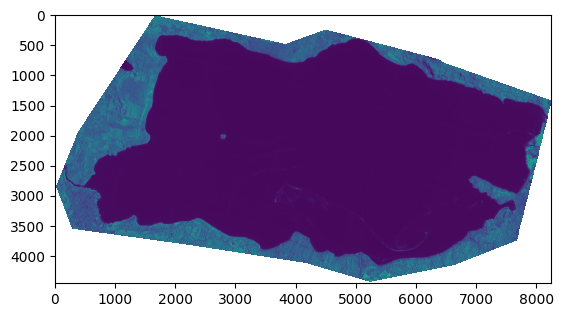

In [9]:
#NIR near infra red band wl 866

stackk_rdy3 = np.stack(image1.data['rhot_866'].to_numpy())
plt.imshow(stackk_rdy3)

# 2. Análisis Espectral

Spectral signature: visualizing the intensity of radiation across the different wavelengths

In [10]:
def stack_img(img, band_wave_lengths):
  arrays = []
  for band_wl in set(band_wave_lengths):
    band_name = "rhot_" + str(band_wl)
    band = img.data[band_name]
    arrays.append(band)
  return np.stack(arrays, axis=-1)

stacked = stack_img(image1, band_wave_lengths)
stacked[100, 100].shape


(8,)

shape (4455, 8245)
center 2227 4122


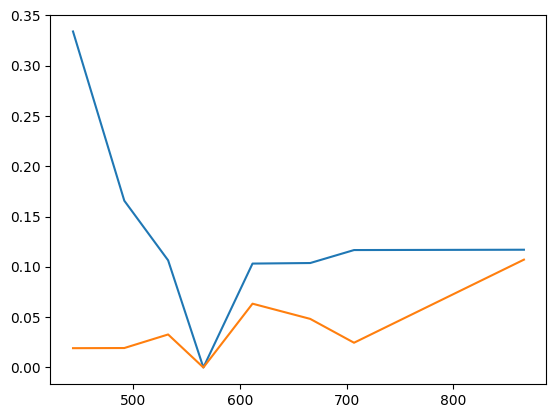

In [11]:
bands_wl = list(dict.fromkeys(band_wave_lengths))
print("shape", stackk_rdy3.shape)
center_y, center_x = (int(stackk_rdy3.shape[0] / 2), int(stackk_rdy3.shape[1] / 2))
print("center", center_y, center_x)
plt.plot(bands_wl, stacked[2000, 1000]) # grass
plt.plot(bands_wl, stacked[center_y, center_x]) # centro (agua)

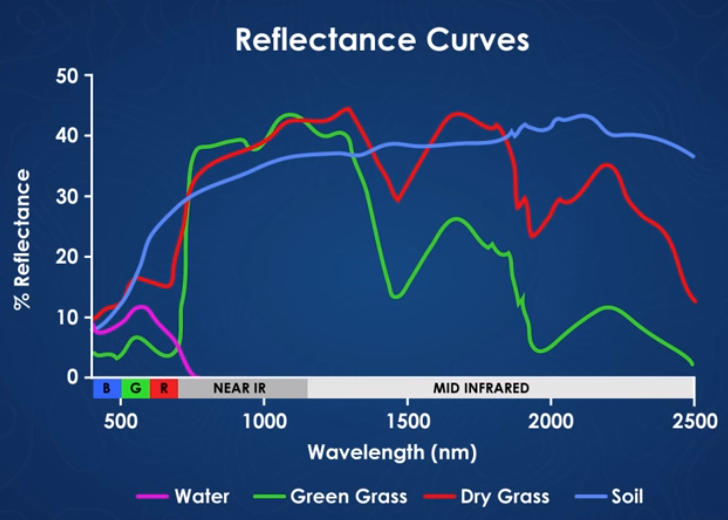

# 3. Detección de Floraciones de Algas

 Normalized Difference Chlorophyll Index (NDCI) is used to predict chlorophyll-a concentration using satellite remote sensing data.

 ACA PA ESTA PARTE HAY Q CALCULAR LA FORMULA PA CADA PIXEL; LUEGO PODEMOS ONDA AGARRAR LOS VALORES SOBRE UN THRESHOLD Y PINTARLOS DE RGB ROJO PA MARCARLOS MUCHO

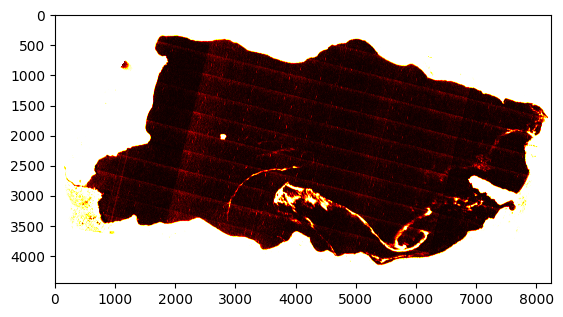

In [12]:
def normalized_difference(img, band1="rhot_707", band2="rhot_666", filter=True):
  """Calculate any index using 2 bands, defaults for NDCI"""
  nump_band1 = img.data[band1].to_numpy()
  nump_band2 = img.data[band2].to_numpy()
  band1 = np.where((nump_band1 == 0) & (nump_band2 == 0), np.nan, nump_band1) # avoid division by 0
  band2 = np.where((nump_band1 == 0) & (nump_band2 == 0), np.nan, nump_band2)

  result_ndci = (band1 - band2) / (band1 + band2)
  if filter:
    result_ndci[result_ndci > 0] = 255
  return result_ndci

indexx = normalized_difference(image1)
plt.imshow(indexx, cmap="hot") # filter=False

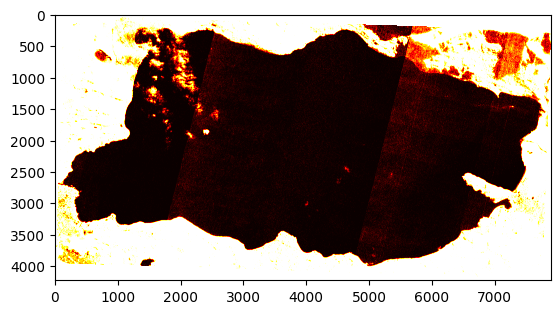

In [13]:
indexx2 = normalized_difference(image2)
plt.imshow(indexx2, cmap="hot")

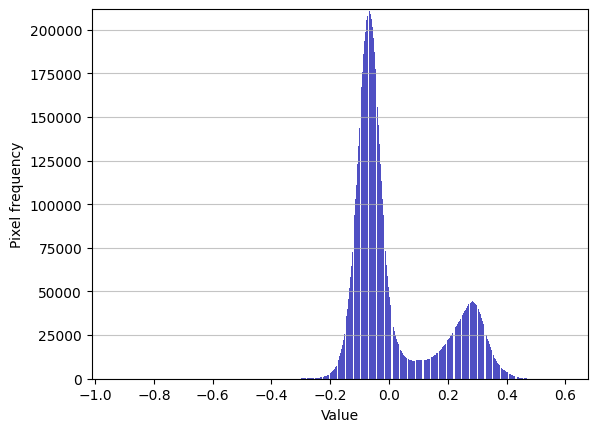

In [14]:
#print(type(indexx))
#indexx.shape
#counts, bins = np.histogram(indexx)
#plt.stairs(counts, bins)
hist_ndci = normalized_difference(image1, filter=False)
n, bins, patches = plt.hist(x=hist_ndci.ravel(), color='#0504aa', bins='auto', alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Pixel frequency')
plt.title('')
maxfreq = n.max()

# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

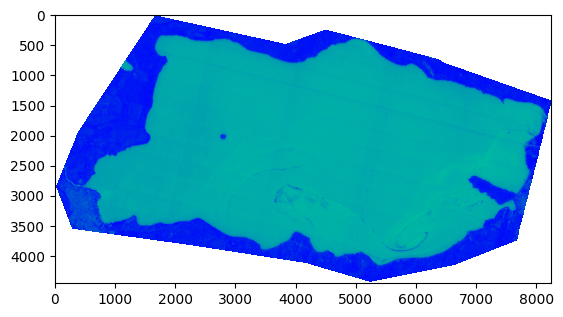

In [15]:
#NDWI = (Green – NIR)/(Green + NIR)

img1_ndwi = normalized_difference(image1, band1="rhot_566", band2="rhot_866", filter=False)
plt.imshow(img1_ndwi, cmap="winter")

Insights

pareciera que esta mas marcado en enero, y en mayo se esparce, por lo que cubre mas area pero con menor intensidad


Desafios

1. RAM insuficiente